In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Task 1

1. Data Exploration and Summary Statistics

In [294]:
#Loading the data set
df=pd.read_csv(r'C:\Users\MYproperty_sales.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Type,Owner
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"$1,059,033.56","549 Jalan Sultan, 50000 Shah Alam, Malacca, Ma...",landed,NaN
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"$1,505,890.92","758 Jalan Indah, 75000 Ipoh, Penang, Malaysia",landed,NaN
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"$1,058,987.99","563 Jalan Kasturi, 30000 Petaling Jaya, Kuala ...",landed,NaN
3,63345.24005,7.188236,5.586729,3.26,34310.24283,"$1,260,616.81","868 Jalan Ampang, 10300 Kuala Lumpur, Malacca,...",landed,NaN
4,59982.19723,5.040555,7.839388,4.23,26354.10947,"$630,943.49","867 Jalan Indah, 25000 Kuantan, Selangor, Mala...",landed,NaN
...,...,...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,"$1,060,193.79","857 Jalan Sultan, 47800 George Town, Penang, M...",landed,NaN
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,"$1,482,617.73","522 Jalan Besar, 40100 Melaka, Penang, Malaysia",landed,NaN
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,"$1,030,729.58","261 Jalan Bukit, 75000 Ipoh, Perak, Malaysia",landed,NaN
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,"$1,198,656.87","485 Jalan Putra, 25000 George Town, Malacca, M...",landed,NaN


In [295]:
summary_statistics = df.describe()
print(summary_statistics)

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population  Owner  
count                   5000.000000      5000.000000    0.0  
mean                       3.981330     36163.516039    NaN  
std                        1.234137      9925.650114    NaN  
min                        2.000000       172.610686    NaN  
25%           

In [296]:
num_columns = len(df.columns)
print("Number of columns:", num_columns)

Number of columns: 9


In [297]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
 Price                          4979
Address                         4989
Type                               1
Owner                              0
dtype: int64

In [298]:
# Drop Type and Owner column. 
df_dropped = df.loc[:, df.nunique() > 1]
num_columns_left = df_dropped.shape[1] 

print("Number of columns left in df_dropped:", num_columns_left)

Number of columns left in df_dropped: 7


In [299]:
# Check data types of the modified DataFrame
print("\nData types of the Modified DataFrame (df_dropped):")
print(df_dropped.dtypes)


Data types of the Modified DataFrame (df_dropped):
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
 Price                           object
Address                          object
dtype: object


In [300]:
# List the columns of the modified DataFrame (df_dropped)
print("Columns before stripping spaces:")
for column in df_dropped.columns:
    print(f"'{column}'") 

Columns before stripping spaces:
'Avg. Area Income'
'Avg. Area House Age'
'Avg. Area Number of Rooms'
'Avg. Area Number of Bedrooms'
'Area Population'
' Price '
'Address'


In [301]:
# Strip spaces from the column names
df_dropped.columns = df_dropped.columns.str.strip()

# List the columns after stripping spaces
print("\nColumns after stripping spaces:")
for column in df_dropped.columns:
    print(f"'{column}'") 


Columns after stripping spaces:
'Avg. Area Income'
'Avg. Area House Age'
'Avg. Area Number of Rooms'
'Avg. Area Number of Bedrooms'
'Area Population'
'Price'
'Address'


In [302]:
print("First few values in the 'price' column:")
print(df_dropped['Price'].head())

First few values in the 'price' column:
0    $1,059,033.56 
1    $1,505,890.92 
2    $1,058,987.99 
3    $1,260,616.81 
4      $630,943.49 
Name: Price, dtype: object


In [303]:
# Strip dollar signs, commas, and whitespace, then convert to float using .loc
df_dropped.loc[:, 'Price'] = df_dropped['Price'].replace({r'\$': '', r',': ''}, regex=True).str.strip()

df_dropped.loc[:, 'Price'] = pd.to_numeric(df_dropped['Price'], errors='coerce')

# Confirm the change by checking the data type and the first few values
print("Data type of 'Price' column after conversion:", df_dropped['Price'].dtype)
print("First few values in the 'Price' column after conversion:")
print(df_dropped['Price'].head())
# Check for NaN values
print("Number of NaN values in 'Price' column:", df_dropped['Price'].isna().sum())

Data type of 'Price' column after conversion: object
First few values in the 'Price' column after conversion:
0    1059033.56
1    1505890.92
2    1058987.99
3    1260616.81
4     630943.49
Name: Price, dtype: object
Number of NaN values in 'Price' column: 20


In [304]:
#summary statistics
print(df_dropped.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population  
count                   5000.000000      5000.000000  
mean                       3.981330     36163.516039  
std                        1.234137      9925.650114  
min                        2.000000       172.610686  
25%                        3.140000     29403.928

In [305]:
missing_values = df_dropped.isnull().sum()

# Display missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

# Summary of total missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")

Missing Values in Each Column:
Avg. Area Income                 0
Avg. Area House Age              0
Avg. Area Number of Rooms        0
Avg. Area Number of Bedrooms     0
Area Population                  0
Price                           20
Address                          4
dtype: int64

Total Missing Values in the Dataset: 24


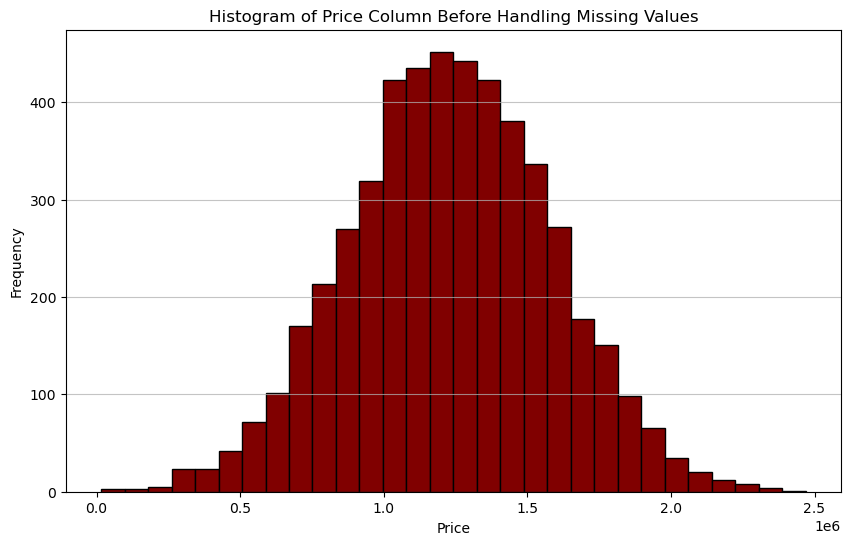

In [306]:
# Histogram to see Price distribution
plt.figure(figsize=(10, 6))
plt.hist(df_dropped['Price'].dropna(), bins=30, color='maroon', edgecolor='black')  
plt.title('Histogram of Price Column Before Handling Missing Values')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [323]:
# Calculate the mean 
mean_price = df_dropped['Price'].mean()

df_dropped = df_dropped.copy()

df_dropped['Price'] = df_dropped['Price'].fillna(mean_price).astype(float)

# Confirm  no more missing values
missing_values_count = df_dropped['Price'].isnull().sum()
if missing_values_count == 0:
    print("Missing values in the 'Price' column have been filled with the mean.")
else:
    print(f"There are still {missing_values_count} missing values in the 'Price' column.")

Missing values in the 'Price' column have been filled with the mean.


In [325]:
# Drop rows with missing values in the 'Address' column
initial_shape = df_dropped.shape  # Store the initial shape for comparison
df_dropped = df_dropped.dropna(subset=['Address'])

# Display the number of rows and columns in the updated dataset
updated_shape = df_dropped.shape
num_rows_dropped = initial_shape[0] - updated_shape[0]  # Calculate the number of rows dropped

print(f'Dropped {num_rows_dropped} rows due to missing values in the "Address" column.')
print(f'Total number of rows after dropping: {updated_shape[0]}')
print(f'Total number of columns: {updated_shape[1]}')

Dropped 4 rows due to missing values in the "Address" column.
Total number of rows after dropping: 4996
Total number of columns: 7


In [22]:
num_rows, num_columns = df_dropped.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

# Get the names of the columns
column_names = df_dropped.columns.tolist()
print('Column names:', column_names)

# Get a summary of the DataFrame
print(df_dropped.info())

Number of rows: 4996
Number of columns: 7
Column names: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4996 non-null   float64
 1   Avg. Area House Age           4996 non-null   float64
 2   Avg. Area Number of Rooms     4996 non-null   float64
 3   Avg. Area Number of Bedrooms  4996 non-null   float64
 4   Area Population               4996 non-null   float64
 5   Price                         4996 non-null   float64
 6   Address                       4996 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.2+ KB
None


Data Exploration 

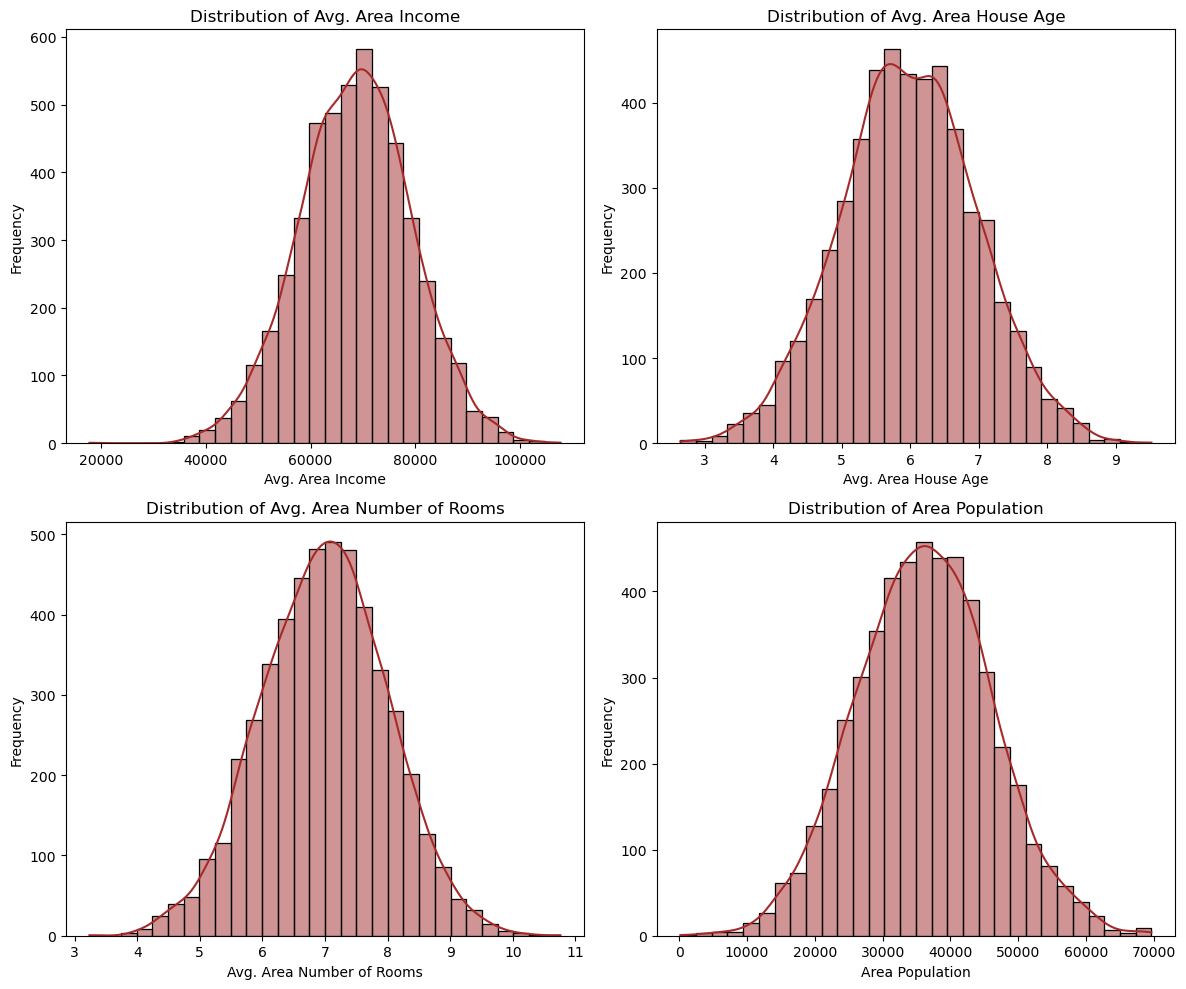

In [332]:
# Numerical columns to analyze
numerical_features = ['Avg. Area Income', 'Avg. Area House Age', 
                      'Avg. Area Number of Rooms', 'Area Population']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

axes = axes.flatten()

# Visualizing
for i, feature in enumerate(numerical_features):
    sns.histplot(df_dropped[feature], kde=True, bins=30, color='brown', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

2. Feature Engineering and Transformation

In [25]:
# Create a DataFrame
df_dropped = pd.DataFrame(df_dropped)

# Split the address into components
address_components = df_dropped['Address'].str.split(',', expand=True)

# Define the regex pattern
# This regex assumes the format: street, postal_code city, state, country
pattern = r'^(.*?), (\d{5}) (.*?), (.*?), (.*?)$'

# Extract data into new columns
df_dropped[['street', 'postal_code', 'city', 'state', 'country']] = df_dropped['Address'].str.extract(pattern)

# Display the result
print(df_dropped)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population       Price  \
0                             4.09      2308

In [26]:
df_dropped.nunique()

Avg. Area Income                4996
Avg. Area House Age             4996
Avg. Area Number of Rooms       4996
Avg. Area Number of Bedrooms     255
Area Population                 4996
Price                           4976
Address                         4989
street                          3746
postal_code                        8
city                               8
state                              7
country                            1
dtype: int64

In [27]:
# drop address since i have distributed it and country because its 1 
df_dropped = df_dropped.drop(columns=['country', 'Address'])

# Confirm the number of columns left
num_columns = df_dropped.shape[1]
print(f"Number of columns left in the DataFrame: {num_columns}")

Number of columns left in the DataFrame: 10


CREATE NEW FEATURES 

In [29]:
# Calculate the Income-Population Index
df_dropped["Income-Population Index (Scaled)"] = df_dropped["Avg. Area Income"] / (df_dropped["Area Population"] + 1)  # Adding 1 to avoid division by zero

In [30]:
# Calculate the Income-Population Index
df_dropped["Income-Population Index (Scaled)"] = df_dropped["Avg. Area Income"] / (df_dropped["Area Population"] + 1)  # Adding 1 to avoid division by zero
# Ensure the scaled index is a float
df_dropped["Income-Population Index (Scaled)"] = df_dropped["Income-Population Index (Scaled)"].astype(float)

# Check the new feature
print(df_dropped[["Avg. Area Income", "Area Population", "Income-Population Index (Scaled)"]].head())

# Optionally, display the first 10 rows of the updated DataFrame to see all new features
print(df_dropped.head(10))

   Avg. Area Income  Area Population  Income-Population Index (Scaled)
0       79545.45857      23086.80050                          3.445346
1       79248.64245      40173.07217                          1.972632
2       61287.06718      36882.15940                          1.661654
3       63345.24005      34310.24283                          1.846195
4       59982.19723      26354.10947                          2.275923
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0        79545.45857             5.682861                   7.009188   
1        79248.64245             6.002900                   6.730821   
2        61287.06718             5.865890                   8.512727   
3        63345.24005             7.188236                   5.586729   
4        59982.19723             5.040555                   7.839388   
5        80175.75416             4.988408                   6.104512   
7        78394.33928             6.989780                   6.620478  

In [31]:
# Get unique entries for 'city' and 'state' columns
unique_cities = df_dropped['city'].unique()
unique_states = df_dropped['state'].unique()

# Display the unique cities and states
print("Unique cities in the data:")
print(unique_cities)

print("\nUnique states in the data:")
print(unique_states)

Unique cities in the data:
['Shah Alam' 'Ipoh' 'Petaling Jaya' 'Kuala Lumpur' 'Kuantan' 'Johor Bahru'
 'George Town' 'Melaka']

Unique states in the data:
['Malacca' 'Penang' 'Kuala Lumpur' 'Selangor' 'Pahang' 'Perak' 'Johor']


In [32]:
# Define the mapping for states to regions
state_to_region = {
    'Malacca': 'Southern',
    'Johor': 'Southern',
    'Penang': 'Northern',
    'Perak': 'Northern',
    'Kuala Lumpur': 'Central',
    'Selangor': 'Central',
    'Pahang': 'Eastern'
}

# Add a new 'Region' column using the mapping
df_dropped['Region'] = df_dropped['state'].map(state_to_region)

# Display the updated DataFrame with the new 'Region' column
print(df_dropped[['state', 'Region']].head())

          state    Region
0       Malacca  Southern
1        Penang  Northern
2  Kuala Lumpur   Central
3       Malacca  Southern
4      Selangor   Central


In [33]:
df_dropped = df_dropped.drop(columns=['postal_code', 'street'])

# Confirmation
print("Columns after dropping:", df_dropped.columns.tolist())

Columns after dropping: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'city', 'state', 'Income-Population Index (Scaled)', 'Region']


In [34]:
# Display the column names of the DataFrame
print(df_dropped.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'city',
       'state', 'Income-Population Index (Scaled)', 'Region'],
      dtype='object')


3. CORRELATION ANALYSIS

In [36]:
# Check the data types of each column in the DataFrame
data_types = df_dropped.dtypes
print(data_types)

Avg. Area Income                    float64
Avg. Area House Age                 float64
Avg. Area Number of Rooms           float64
Avg. Area Number of Bedrooms        float64
Area Population                     float64
Price                               float64
city                                 object
state                                object
Income-Population Index (Scaled)    float64
Region                               object
dtype: object


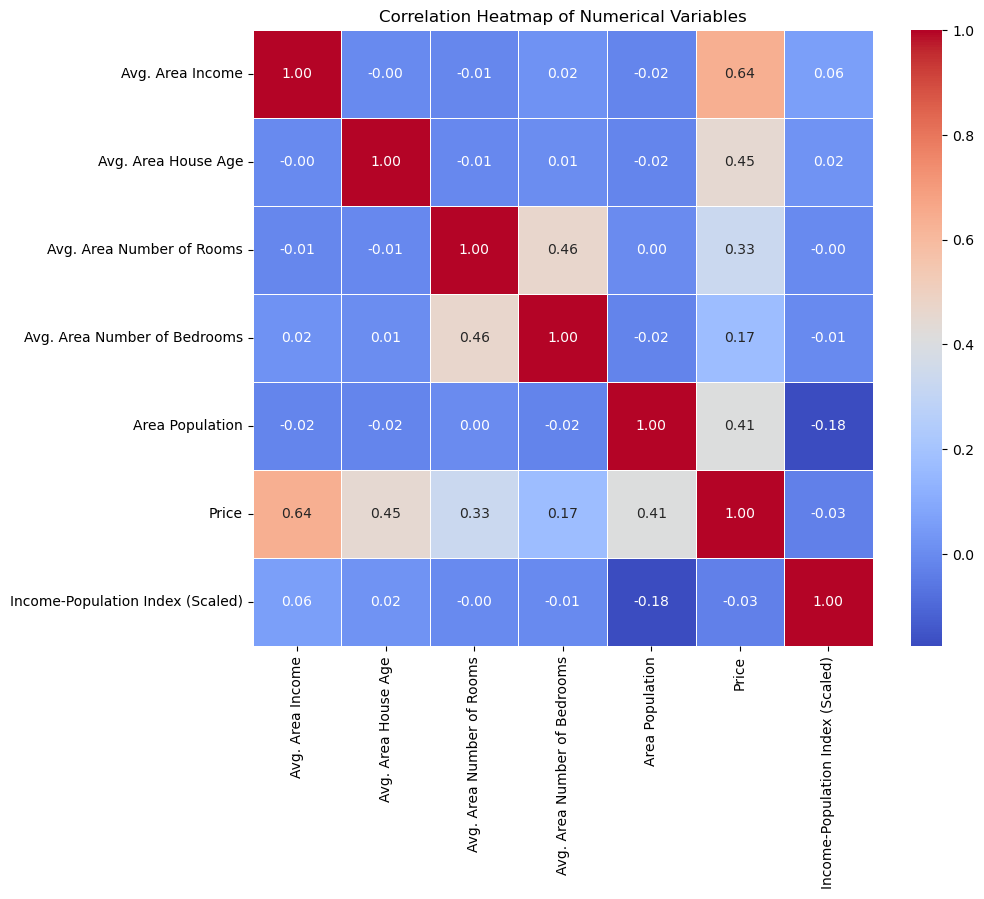

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df_dropped.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,         # Show the correlation coefficients
    cmap='coolwarm',    # Use the 'coolwarm' color map
    fmt='.2f',          # Format for annotations
    linewidths=0.5      # Add lines between cells
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

4. Handling data types and outliers 

encoding first 

In [40]:
# Get unique values in the 'city' column
unique_cities = df_dropped['city'].unique()

# Display the unique cities
print("Unique cities in the DataFrame:")
print(unique_cities)

Unique cities in the DataFrame:
['Shah Alam' 'Ipoh' 'Petaling Jaya' 'Kuala Lumpur' 'Kuantan' 'Johor Bahru'
 'George Town' 'Melaka']


In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to 'city', 'state', and 'Region'
df_dropped['city_encoded'] = label_encoder.fit_transform(df_dropped['city'])
df_dropped['state_encoded'] = label_encoder.fit_transform(df_dropped['state'])
df_dropped['region_encoded'] = label_encoder.fit_transform(df_dropped['Region'])

# Drop the original columns
df_dropped = df_dropped.drop(columns=['city', 'state', 'Region'])

# Display the first few rows to verify
print(df_dropped.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population       Price  \
0                          4.09      23086.80050  1059033.56   
1                          3.09      40173.07217  1505890.92   
2                          5.13      36882.15940  1058987.99   
3                          3.26      34310.24283  1260616.81   
4                          4.23      26354.10947   630943.49   

   Income-Population Index (Scaled)  city_encoded  state_encoded  \
0                          3.445346             7              2   
1                          1.972632             1   

In [42]:
# Display the column names of the DataFrame
print(df_dropped.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Income-Population Index (Scaled)', 'city_encoded', 'state_encoded',
       'region_encoded'],
      dtype='object')


In [43]:
# List of columns to check for outliers
columns_to_check = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Price', 
    'Income-Population Index (Scaled)'
]

# Initialize a DataFrame to store outliers
outlier_data = pd.DataFrame()

# Calculate the IQR for each specified column and identify outliers
for column in columns_to_check:
    Q1 = df_dropped[column].quantile(0.25)
    Q3 = df_dropped[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_dropped[(df_dropped[column] < lower_bound) | (df_dropped[column] > upper_bound)]
    
    # Append outliers to the outlier_data DataFrame
    outlier_data = pd.concat([outlier_data, outliers])

# Display the outliers
print("Outliers in the specified columns:")
print(outlier_data)

Outliers in the specified columns:
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
12         39033.80924             7.671755                   7.250029   
39         17796.63119             4.949557                   6.713905   
411        36100.44423             5.778489                   5.497450   
558        99629.01358             5.431863                   7.351398   
693       107701.74840             7.143522                   8.518608   
...                ...                  ...                        ...   
4843       82973.13756             7.266681                   5.575816   
4943       76563.97504             7.205100                   6.504769   
4946       81602.53935             3.719436                   6.170817   
4950       76695.53925             6.588424                   8.382505   
4974       70720.29646             6.411801                   5.048128   

      Avg. Area Number of Bedrooms  Area Population         Price  \
12     

In [44]:
# List of columns to check for outliers
columns_to_check = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Price', 
    'Income-Population Index (Scaled)'
]

# Initialize a dictionary to store the count of outliers for each column
outlier_counts = {}

# Calculate the IQR for each specified column and count outliers
for column in columns_to_check:
    Q1 = df_dropped[column].quantile(0.25)
    Q3 = df_dropped[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_dropped[(df_dropped[column] < lower_bound) | (df_dropped[column] > upper_bound)]
    
    # Count the number of outliers
    outlier_count = outliers.shape[0]
    
    # Store the count in the dictionary
    outlier_counts[column] = outlier_count

# Display the number of outliers for each column
print("Number of outliers in each specified column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

Number of outliers in each specified column:
Avg. Area Income: 32 outliers
Avg. Area House Age: 25 outliers
Avg. Area Number of Rooms: 25 outliers
Avg. Area Number of Bedrooms: 0 outliers
Area Population: 30 outliers
Price: 39 outliers
Income-Population Index (Scaled): 213 outliers


DECIDED TO KEEP OUTLIERS 

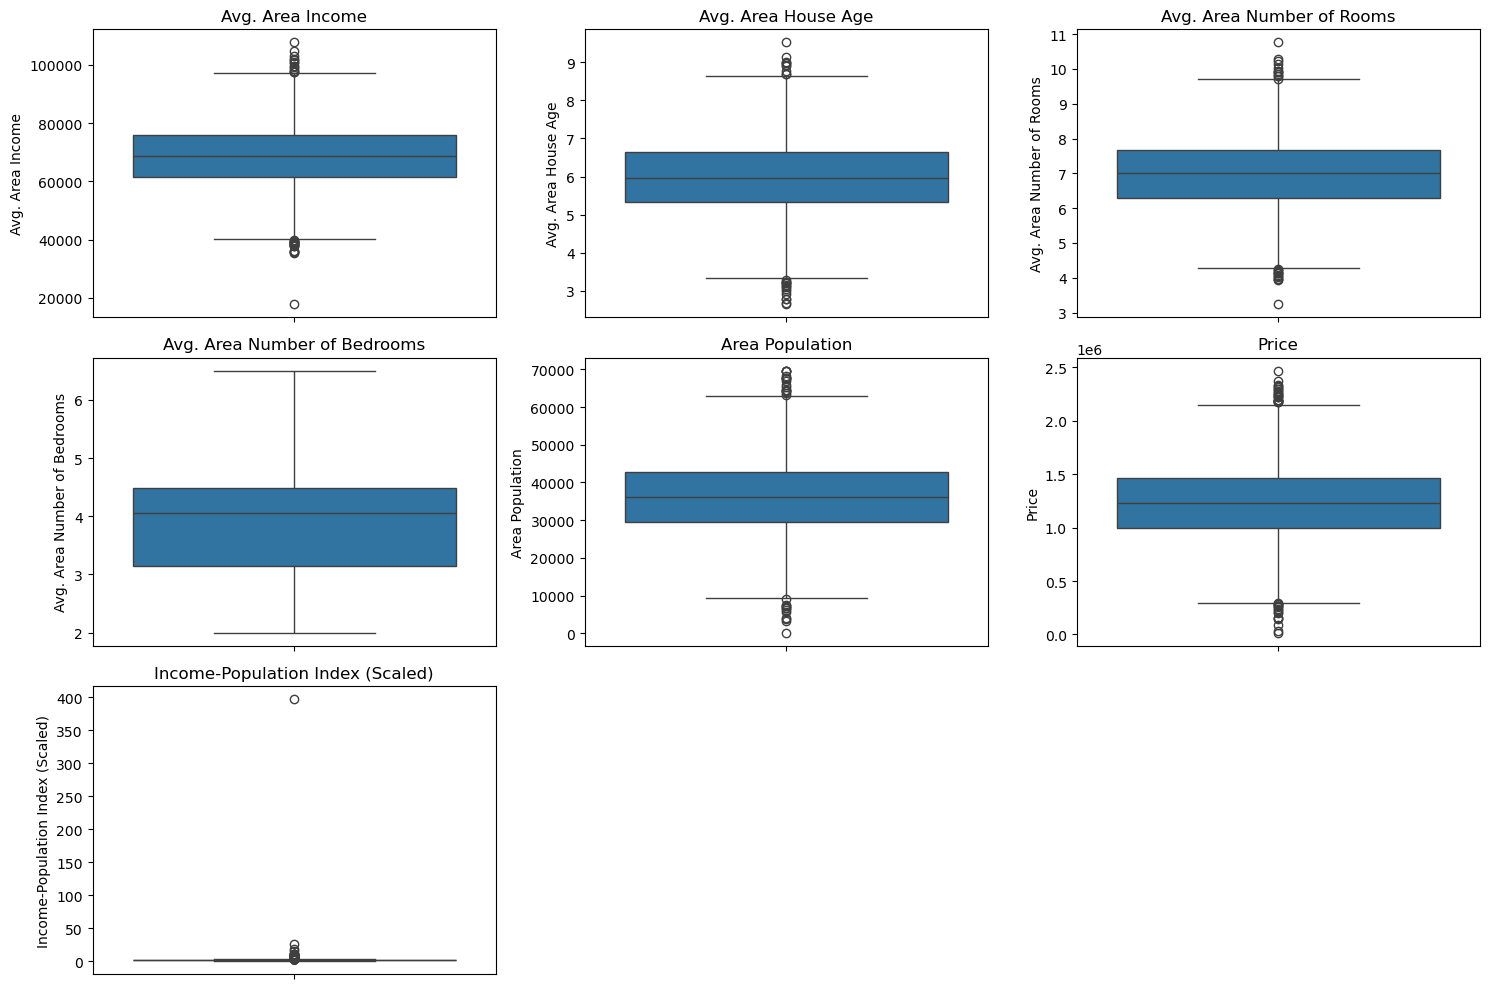

In [46]:
# List of columns to check for outliers
columns_to_check = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Price', 
    'Income-Population Index (Scaled)'
]

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(y=df_dropped[column])
    plt.title(column)

plt.tight_layout()  
plt.show()

Skewness of the specified columns:
Avg. Area Income                    -0.034092
Avg. Area House Age                 -0.007108
Avg. Area Number of Rooms           -0.040698
Avg. Area Number of Bedrooms         0.376111
Area Population                      0.048934
Income-Population Index (Scaled)    67.618569
dtype: float64


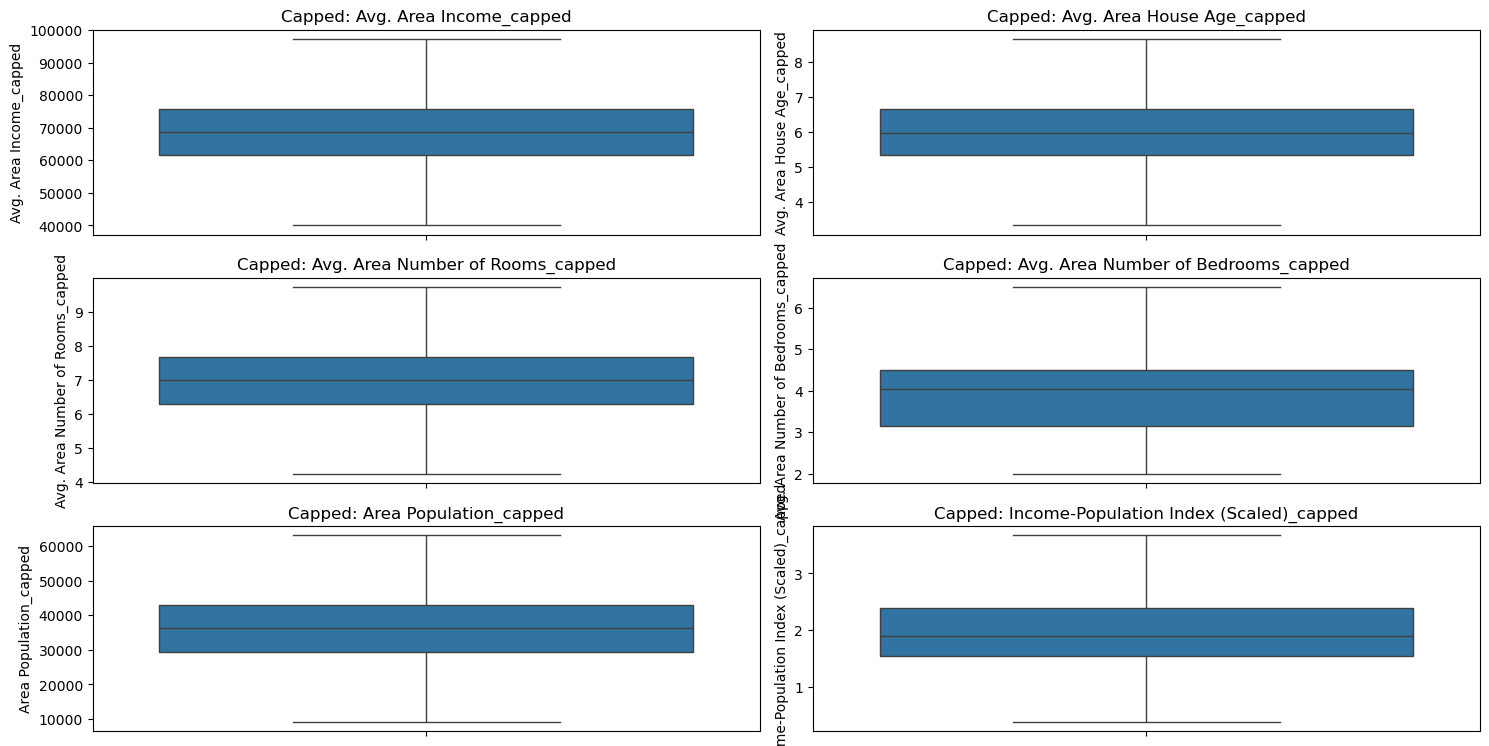

In [47]:
# List of columns to handle for capping and flooring
columns_to_handle = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Income-Population Index (Scaled)'
]
for column in columns_to_handle:
    
    Q1 = df_dropped[column].quantile(0.25)
    Q3 = df_dropped[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_dropped[column + '_capped'] = np.where(df_dropped[column] > upper_bound, upper_bound, df_dropped[column])
    df_dropped[column + '_capped'] = np.where(df_dropped[column + '_capped'] < lower_bound, lower_bound, df_dropped[column + '_capped'])

# List of columns to check for skewness
columns_to_check = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Income-Population Index (Scaled)'
]
skewness = df_dropped[columns_to_check].skew()
print("Skewness of the specified columns:")
print(skewness)

#List of columns to visualize (capped versions)
columns_to_handle = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Income-Population Index (Scaled)'
]
# Set the size of the plots
plt.figure(figsize=(15, 10))
# Create box plots for each capped column
for i, column in enumerate(columns_to_handle):
    plt.subplot(4, 2, i + 1)  
    sns.boxplot(y=df_dropped[column + '_capped'])
    plt.title(f'Capped: {column}_capped')
plt.tight_layout()  
plt.show()

In [48]:
# Assuming df_dropped is your DataFrame
print("Column names:", df_dropped.columns.tolist())

Column names: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Income-Population Index (Scaled)', 'city_encoded', 'state_encoded', 'region_encoded', 'Avg. Area Income_capped', 'Avg. Area House Age_capped', 'Avg. Area Number of Rooms_capped', 'Avg. Area Number of Bedrooms_capped', 'Area Population_capped', 'Income-Population Index (Scaled)_capped']


In [49]:
import pandas as pd

# Assuming df_dropped is your DataFrame
df_dropped = df_dropped.drop(columns=[
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Income-Population Index (Scaled)'
])
# Confirmation
print("Columns after dropping:", df_dropped.columns.tolist())

Columns after dropping: ['Price', 'city_encoded', 'state_encoded', 'region_encoded', 'Avg. Area Income_capped', 'Avg. Area House Age_capped', 'Avg. Area Number of Rooms_capped', 'Avg. Area Number of Bedrooms_capped', 'Area Population_capped', 'Income-Population Index (Scaled)_capped']


In [50]:
# Assuming df_dropped is your DataFrame
df_dropped.columns = df_dropped.columns.str.replace('_capped', '', regex=False)

# Confirmation
print("Columns after renaming:", df_dropped.columns.tolist())

Columns after renaming: ['Price', 'city_encoded', 'state_encoded', 'region_encoded', 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Income-Population Index (Scaled)']


In [51]:
# Assuming df_dropped is your DataFrame
# Define the new column order
new_column_order = [
    'Avg. Area Income', 
    'Avg. Area House Age', 
    'Avg. Area Number of Rooms', 
    'Avg. Area Number of Bedrooms', 
    'Area Population', 
    'Income-Population Index (Scaled)', 
    'city_encoded', 
    'state_encoded', 
    'region_encoded', 
    'Price'
]

# Reorder the DataFrame
df_dropped = df_dropped[new_column_order]

# Confirmation
print("Columns after rearranging:", df_dropped.columns.tolist())

Columns after rearranging: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Income-Population Index (Scaled)', 'city_encoded', 'state_encoded', 'region_encoded', 'Price']


In [52]:
df_dropped.to_csv(r'C:\Users\midnight.csv', index=False)
print("Data saved successfully to 'my_data.csv'.")

Data saved successfully to 'my_data.csv'.


# TASK 2 

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance

In [55]:
# Check for missing values in the DataFrame
missing_values = df_dropped.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [56]:
# Check for duplicated records in the DataFrame
duplicate_count = df_dropped.duplicated().sum()

# Display the number of duplicated records
print(f"Number of duplicated records: {duplicate_count}")

Number of duplicated records: 0


In [57]:
# Split data into features (X) and target (y)
X = df_dropped.drop(columns=['Price'])  # Assuming 'Price' is the target
y = df_dropped['Price']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and X_test_scaled to train your models

In [58]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")


Random Forest:
R^2 Score: 0.8779541480829047
RMSE: 121665.73594360646


In [59]:
# Initialize and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost:")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")


XGBoost:
R^2 Score: 0.8674629419413732
RMSE: 126787.20820407046


In [60]:
from sklearn.neighbors import KNeighborsRegressor # Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
knn_preds = knn.predict(X_test_scaled)

# Print the R^2 score
print(f"KNN R^2: {knn.score(X_test_scaled, y_test)}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, knn_preds))
print(f"RMSE: {rmse}")

KNN R^2: 0.7964526416562572
RMSE: 157122.908980511


EVALUATE MODEL PERFORMANCE 

In [62]:
# Create a summary table
results = {
    "Model": ["Random Forest", "XGBoost", "KNN"],
    "R² Score": [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), knn.score(X_test_scaled, y_test)],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, knn_preds)),
    ],
}

results_df = pd.DataFrame(results)
print(results_df)

           Model  R² Score           RMSE
0  Random Forest  0.877954  121665.735944
1        XGBoost  0.867463  126787.208204
2            KNN  0.796453  157122.908981


 HYPERPARAMETER TUNING and REGULARIZATION 

In [91]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],      # Max depth of trees
    'min_samples_split': [5, 10, 15],  # Regularization: minimum samples to split a node
    'min_samples_leaf': [2, 4, 6],    # Regularization: minimum samples per leaf
    'bootstrap': [True, False]        # Use bootstrap sampling or not
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get best parameters and model
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_rf = rf_best_model.predict(X_test)
print(f"Best RF R²: {r2_score(y_test, y_pred_rf)}")
print(f"Best RF RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF R²: 0.8796593166673985
Best RF RMSE: 120812.81742867088


In [92]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 1, 5],  # Regularization parameter
    'min_child_weight': [1, 3, 5]  # Regularization parameter
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Get best parameters and model
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
xgb_best_model = grid_search_xgb.best_estimator_

# Evaluate the best model
y_pred_xgb = xgb_best_model.predict(X_test)
print(f"Best XGBoost R²: {r2_score(y_test, y_pred_xgb)}")
print(f"Best XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best XGBoost Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}
Best XGBoost R²: 0.8983433243307987
Best XGBoost RMSE: 111038.79179084378


In [95]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],  # Regularization: Adjust the weighting of neighbors
    'metric': ['euclidean', 'manhattan']  # Regularization: Choose the distance metric
}

# Initialize KNN model
knn_model = KNeighborsRegressor()

# Perform GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_scaled, y_train)

# Get best parameters and model
print("Best KNN Parameters:", grid_search_knn.best_params_)
knn_best_model = grid_search_knn.best_estimator_

# Evaluate the best model
knn_preds = knn_best_model.predict(X_test_scaled)
print(f"Best KNN R²: {knn_best_model.score(X_test_scaled, y_test)}")
print(f"Best KNN RMSE: {np.sqrt(mean_squared_error(y_test, knn_preds))}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best KNN R²: 0.8046358021787354
Best KNN RMSE: 153932.12511136167


In [ ]:
## 

In [101]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Random Forest
y_train_pred_rf = rf_best_model.predict(X_train)
y_test_pred_rf = rf_best_model.predict(X_test)

print("Random Forest - Training Performance:")
print(f"R²: {r2_score(y_train, y_train_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf))}")

print("\nRandom Forest - Test Performance:")
print(f"R²: {r2_score(y_test, y_test_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf))}")

# XGBoost
y_train_pred_xgb = xgb_best_model.predict(X_train)
y_test_pred_xgb = xgb_best_model.predict(X_test)

print("\nXGBoost - Training Performance:")
print(f"R²: {r2_score(y_train, y_train_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))}")

print("\nXGBoost - Test Performance:")
print(f"R²: {r2_score(y_test, y_test_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))}")

# KNN
y_train_pred_knn = knn_best_model.predict(X_train_scaled)
y_test_pred_knn = knn_best_model.predict(X_test_scaled)

print("\nKNN - Training Performance:")
print(f"R²: {r2_score(y_train, y_train_pred_knn)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_knn))}")

print("\nKNN - Test Performance:")
print(f"R²: {r2_score(y_test, y_test_pred_knn)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_knn))}")

Random Forest - Training Performance:
R²: 0.972904145002111
RMSE: 58118.169706622364

Random Forest - Test Performance:
R²: 0.8796593166673985
RMSE: 120812.81742867088

XGBoost - Training Performance:
R²: 0.928282354526546
RMSE: 94552.60761336492

XGBoost - Test Performance:
R²: 0.8983433243307987
RMSE: 111038.79179084378

KNN - Training Performance:
R²: 1.0
RMSE: 0.0

KNN - Test Performance:
R²: 0.8046358021787354
RMSE: 153932.12511136167


 cross validation

In [105]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='r2')

print("Random Forest Cross-Validation R² Scores:", rf_cv_scores)
print(f"Mean CV R²: {rf_cv_scores.mean()}")
print(f"Standard Deviation of CV R²: {rf_cv_scores.std()}")

Random Forest Cross-Validation R² Scores: [0.87983905 0.87536888 0.88067531 0.86748681 0.8768925 ]
Mean CV R²: 0.8760525114210536
Standard Deviation of CV R²: 0.004695790555452207


In [106]:
xgb_cv_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=5, scoring='r2')

print("XGBoost Cross-Validation R² Scores:", xgb_cv_scores)
print(f"Mean CV R²: {xgb_cv_scores.mean()}")
print(f"Standard Deviation of CV R²: {xgb_cv_scores.std()}")

XGBoost Cross-Validation R² Scores: [0.91185604 0.90694583 0.90625813 0.90352988 0.90611561]
Mean CV R²: 0.9069410962533141
Standard Deviation of CV R²: 0.0027181224771511817


In [107]:
knn_cv_scores = cross_val_score(knn_best_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("KNN Cross-Validation R² Scores:", knn_cv_scores)
print(f"Mean CV R²: {knn_cv_scores.mean()}")
print(f"Standard Deviation of CV R²: {knn_cv_scores.std()}")


KNN Cross-Validation R² Scores: [0.80378881 0.79760403 0.8065473  0.8093339  0.80856808]
Mean CV R²: 0.8051684258565187
Standard Deviation of CV R²: 0.004241076533929567


 COMPARING FEATURE IMPORTANCE 

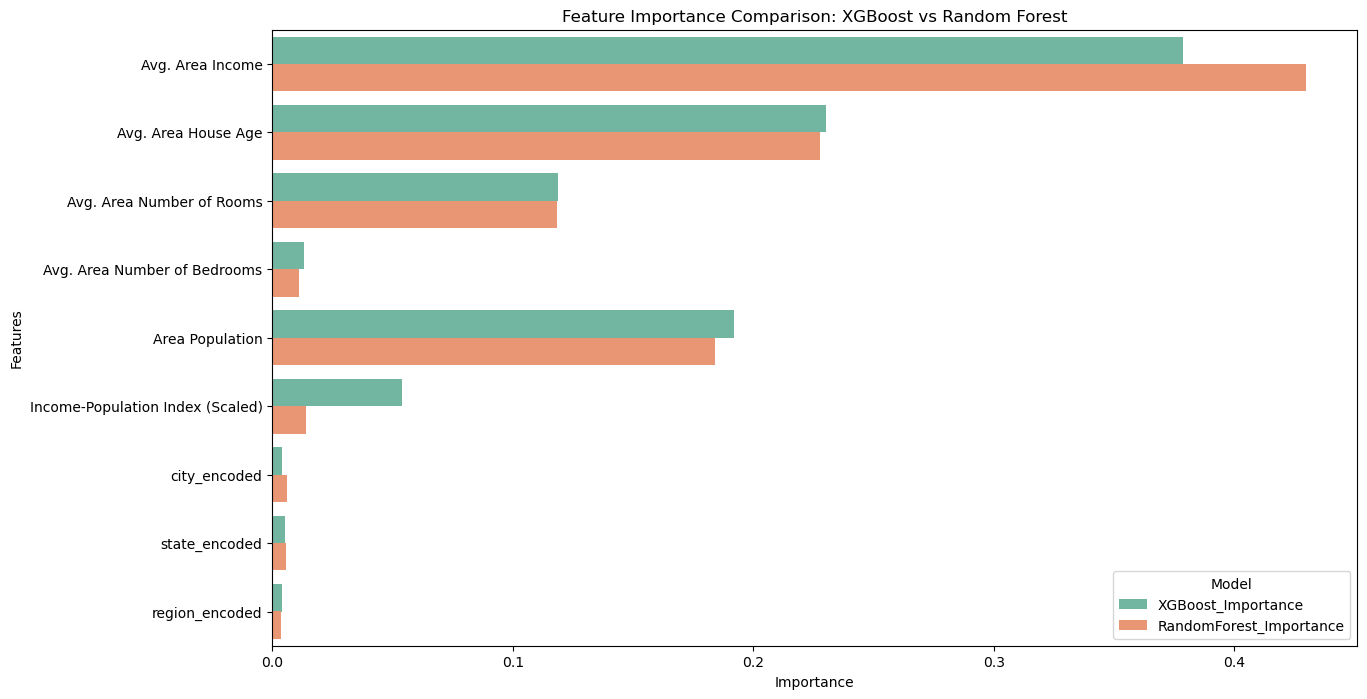

In [115]:
# Combine feature importance into one DataFrame
combined_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost_Importance': xgb_best_model.feature_importances_,
    'RandomForest_Importance': rf_best_model.feature_importances_
}).melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Plotting the combined feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=combined_feature_importance, palette='Set2')
plt.title('Feature Importance Comparison: XGBoost vs Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.legend(title='Model')
plt.show()